# **Transformación de Datos**
Con el dataset limpio, se procede a realizar la etapa de transformación de datos.


### **Objetivos**

1. **Ingeniería de características**: Se crea una nueva columna para el análisis.
2. **Normalización**: Escalado de los valores numéricos a un rango entre 0 y 1.
3. **Estandarización**: Transformación de los datos numéricos para tener media 0 y desviación estándar 1.

### Importar librerías 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### Cargando el Dataset

In [2]:
df = pd.read_csv("../data/dataset_clean.csv")

### Ingeniería de Características
Se crea una nueva columna llamada **`Dominant_Pollutant`**  que indica cuál es el contaminante con el valor de AQI más alto para cada registro. Esto va ayudar a identificar qué contaminante está predominando en cada ubicación. es el contaminante dominante (CO, Ozone, NO2, PM2.5)

In [3]:
def contaminante_dominante(row):
    
    # Este diccionario almacena los nombres de los contaminantes como claves
    contaminantes = { 
        'CO': row['CO AQI Value'],
        'Ozone': row['Ozone AQI Value'],
        'NO2': row['NO2 AQI Value'],
        'PM2.5': row['PM2.5 AQI Value']    
    }
    
    # Se devuelve el contaminante con el mayor valor de AQI
    return max(contaminantes, key=contaminantes.get)

# Se aplica la función a cada fila del Dataframe
df['Dominant_Pollutant'] = df.apply(contaminante_dominante, axis=1)

# Mostrar las primeras filas para vereficar
print(df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'Dominant_Pollutant']].head())


   CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0             1               36              0               51   
1             1                5              1               41   
2             1               39              2               66   
3             1               34              0               20   
4             0               22              0                6   

  Dominant_Pollutant  
0              PM2.5  
1              PM2.5  
2              PM2.5  
3              Ozone  
4              Ozone  


#### Impresión de las Primeras 5 Filas del Dataset con la nueva columna

In [4]:
df.head()

,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Dominant_Pollutant
0,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,PM2.5
1,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,PM2.5
2,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,PM2.5
3,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,Ozone
4,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,Ozone


### Normalización

Los valores numéricos se deben escalar para estar en un rango entre 0 y 1. Esto es útil cuando hay variables en diferentes escalas para obtener una homogeneización de los datos.

Aplicaremos **Min-Max Scaling** a las columnas numéricas para restringir sus valores dentro del rango 0-1.

In [5]:
# Se crea una copia del DataFrame antes de la normalización
df_normalizado = df.copy()

columnas_normalizadas = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Aplicamos la normalización (Escalado Min-Max)
minmax_scaler = MinMaxScaler()
df_normalizado[columnas_normalizadas] = minmax_scaler.fit_transform(df_normalizado[columnas_normalizadas])

# Se muestra las primeras filas después de la normalización
df_normalizado[columnas_normalizadas].head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,0.091093,0.007519,0.153191,0.000000,0.102
1,0.070850,0.007519,0.021277,0.010989,0.082
2,0.121457,0.007519,0.165957,0.021978,0.132
3,0.056680,0.007519,0.144681,0.000000,0.040
4,0.032389,0.000000,0.093617,0.000000,0.012


### Visualizaciones

#### Distribución de los valores antes y después de la Normalización

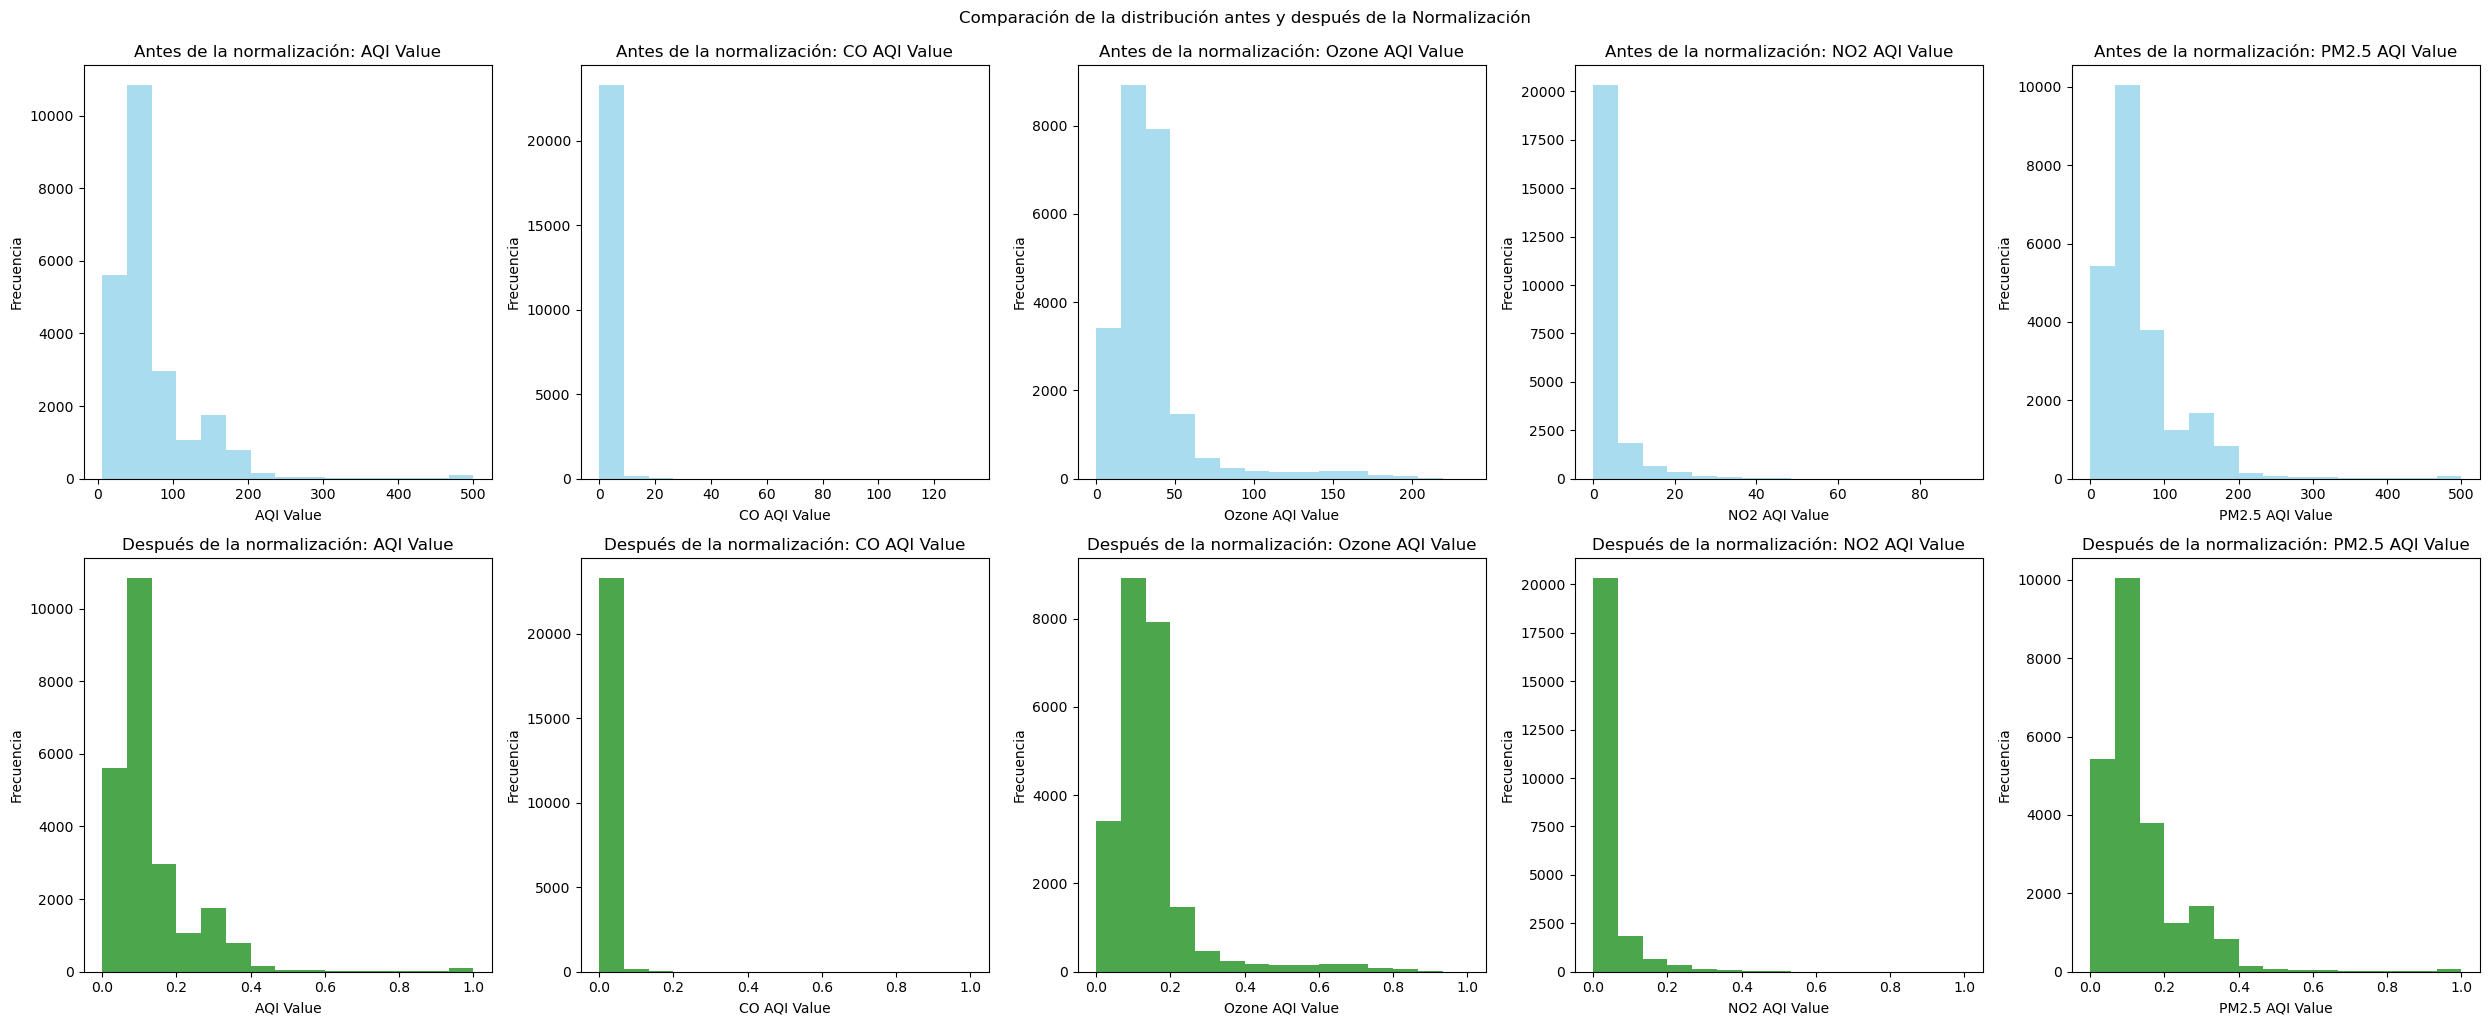

In [8]:
# Se crea una figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=len(columnas_normalizadas), figsize=(25, 10))

# Histograma antes de la normalización (Fila 1)
for i, col in enumerate(columnas_normalizadas):
    axes[0, i].hist(df[col], bins=15, color= 'skyblue', alpha=0.7)
    axes[0, i].set_title(f"Antes de la normalización: {col}")
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel("Frecuencia")
    
for i, col in enumerate(columnas_normalizadas):
    axes[1, i].hist(df_normalizado[col], bins=15, color= 'green', alpha=0.7)
    axes[1, i].set_title(f"Después de la normalización: {col}")
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel("Frecuencia")
    
# Se ajusta el espaciado
plt.tight_layout()
plt.suptitle("Comparación de la distribución antes y después de la Normalización", y=1.02)
plt.show()

#### Scatter Plot para ver relaciones entre contaminantes

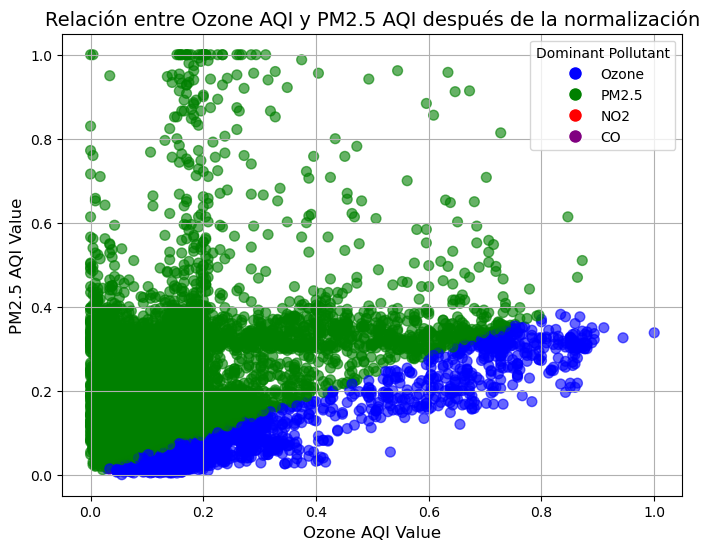

In [15]:
# Selección de colores basados en la columna 'Dominant_Pollutant'
colors = {'Ozone': 'blue', 'PM2.5': 'green', 'NO2': 'red', 'CO': 'purple'}

# Scatter plot con dos colores basados en 'Dominant_Pollutant'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_normalizado['Ozone AQI Value'], df_normalizado['PM2.5 AQI Value'], 
                      c=df_normalizado['Dominant_Pollutant'].map(colors), alpha=0.6, s=50)

plt.title("Relación entre Ozone AQI y PM2.5 AQI después de la normalización", fontsize=14)
plt.xlabel("Ozone AQI Value", fontsize=12)
plt.ylabel("PM2.5 AQI Value", fontsize=12)

# Grilla
plt.grid(True)

# Leyenda para el color de los puntos
legenda = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, 
                          label=label) for label, color in colors.items()]
plt.legend(handles=legenda, title="Dominant Pollutant")

plt.show()

### Conclusiones Finales

Como sintesis final, el análisis de los datos respecto al dataset de contaminación del aire a nivel global reveló patrones importantes. Si bien la mayoría de los valores de calidad del aire caen en rangos aceptables, existen picos de alta contaminación que se pueden investigar más a fondo en un posterior análisis, especialmente en regiones donde predomina un contaminante específico. Las transformaciones de los datos y la creación de nuevas variables, como `Dominant_Pollutant`, permite un análisis más profundo de las tendencias de contaminación. La limpieza de datos aseguró que los resultados fueran precisos y confiables, brindando una base sólida para futuros análisis predictivos o estudios más específicos sobre la contaminación del aire.